In [2]:
from numpy import unique, argmax
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.utils import plot_model
from matplotlib import pyplot
import matplotlib.pyplot as plt
import numpy as np

In [3]:
(x_train, y_train), (x_test, y_test) = load_data()
x_train=x_train.reshape((x_train.shape[0], x_train.shape[1], x_train.shape[2], 1))
x_test=x_test.reshape((x_test.shape[0], x_test.shape[1], x_test.shape[2], 1))

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

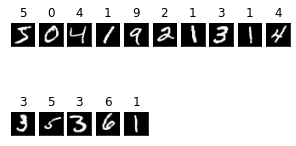

In [7]:
fig = plt.figure(figsize=(5,3))
for i in range(15):
    ax=fig.add_subplot(2,10, i+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_train[i]), cmap='gray')
    ax.set_title(y_train[i])

In [8]:
img_shape = x_train.shape[1:]
print(img_shape)

(28, 28, 1)


In [15]:
model = Sequential()

model.add(Conv2D(32, (3,3), input_shape = (28,28,1), activation='relu'))
model.add(MaxPool2D((2,2)))
                              
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Flatten())

model.add(Dropout(0.25))
 
model.add(Dense(10, activation="softmax"))





In [16]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)             

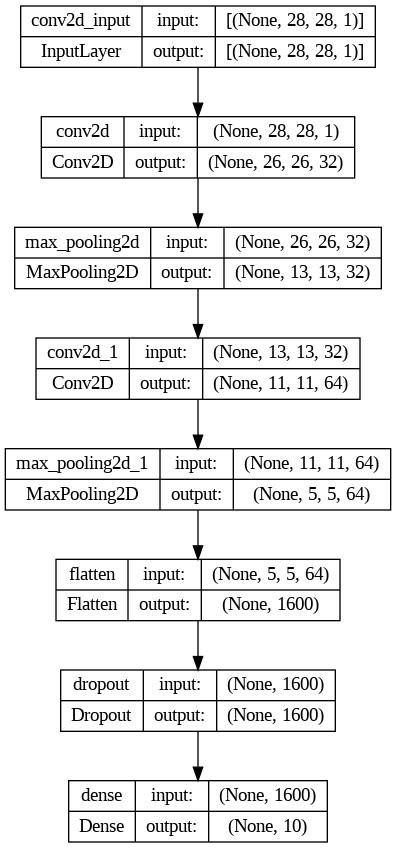

In [17]:
plot_model(model, 'model.jpg', show_shapes=True)

In [19]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

x=model.fit(x_train, y_train, epochs=10, batch_size=128, verbose=2, validation_split=0.1)

Epoch 1/10
422/422 - 52s - loss: 0.3337 - accuracy: 0.9004 - val_loss: 0.0912 - val_accuracy: 0.9730 - 52s/epoch - 124ms/step
Epoch 2/10
422/422 - 47s - loss: 0.0961 - accuracy: 0.9699 - val_loss: 0.0631 - val_accuracy: 0.9825 - 47s/epoch - 112ms/step
Epoch 3/10
422/422 - 49s - loss: 0.0720 - accuracy: 0.9779 - val_loss: 0.0497 - val_accuracy: 0.9863 - 49s/epoch - 115ms/step
Epoch 4/10
422/422 - 48s - loss: 0.0591 - accuracy: 0.9817 - val_loss: 0.0429 - val_accuracy: 0.9872 - 48s/epoch - 114ms/step
Epoch 5/10
422/422 - 47s - loss: 0.0506 - accuracy: 0.9843 - val_loss: 0.0366 - val_accuracy: 0.9902 - 47s/epoch - 112ms/step
Epoch 6/10
422/422 - 48s - loss: 0.0438 - accuracy: 0.9867 - val_loss: 0.0405 - val_accuracy: 0.9888 - 48s/epoch - 114ms/step
Epoch 7/10
422/422 - 47s - loss: 0.0398 - accuracy: 0.9875 - val_loss: 0.0352 - val_accuracy: 0.9895 - 47s/epoch - 110ms/step
Epoch 8/10
422/422 - 45s - loss: 0.0347 - accuracy: 0.9886 - val_loss: 0.0328 - val_accuracy: 0.9908 - 45s/epoch - 107

In [20]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f'Accuracy: {accuracy*100}')

Accuracy: 99.00000095367432


<function matplotlib.pyplot.show(*args, **kw)>

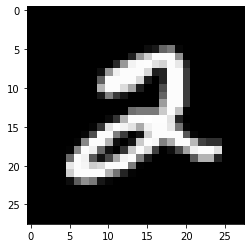

In [21]:
image = x_train[5]

plt.imshow(np.squeeze(image), cmap='gray')
plt.show

In [22]:
image = image.reshape(1, image.shape[0], image.shape[1], image.shape[2])
p = model.predict([image])
print('Predicted: {}' .format(argmax(p)))

1/1 [==============================] - 0s 109ms/step
Predicted: 2
